In [1]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from matplotlib.colors import LinearSegmentedColormap
import TestingTrainingSplit

# Create Custom Color Map
colors = np.array([(22,98,248), (48,141,250), (71,172,251), (100,201,252), (129,222,253),(162,240,254), (215,249,253), (255,255,255), 
                   (255,255,255), (255,249,217), (247,236,155), (254,221,128), (254,202,100), (255,173,71), (252,142,42), (255,101,15)])/255
custom_cmap = LinearSegmentedColormap.from_list('cmap', colors)

TraingPredictorData, TrainingTargetData, TestingPredictorData, TestingTargetData = TestingTrainingSplit.training_testing_split()

In [49]:
np.shape(TraingPredictorData)

(5400, 10368)

In [48]:
np.shape([[0,0], [1, 1], [2, 2]])

(3, 2)

(9750,)


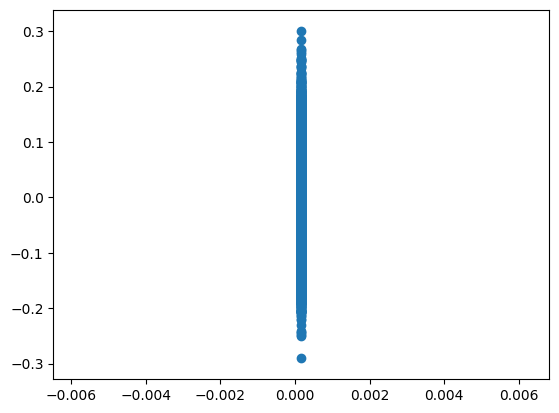

In [56]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
x = TraingPredictorData
y = TrainingTargetData[:,0]
clf.fit(x,y)
Y_pred = clf.predict(TestingPredictorData)
print(np.shape(Y_pred))
#print(clf.coef_)
#print(clf.intercept_)
plt.scatter(Y_pred, TestingTargetData[:,0])

In [45]:
from scipy import stats
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet 
 


model = ElasticNet(random_state=0)
x = TraingPredictorData[:,0]
y = TrainingTargetData[:,0]
linear_model = model.fit(x.T,y.T)
Y_pred = linear_model.predict(TestingPredictorData)
R2 = stats.pearsonr(TestingTargetData[:,0], Y_pred)[0]
#print(R2)

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.0139329   0.01412829  0.00776    ...  0.0068458  -0.01105641
 -0.01054734].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [28]:
[print(stats.pearsonr(TestingTargetData[:,i], Y_pred[:,i])[0]**2) for i in range(6)]

nan
nan
nan
nan
nan
nan


/home/disk/p/aodhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


[None, None, None, None, None, None]

In [14]:
model = Ridge()
linear_model = model.fit(TraingPredictorData, TrainingTargetData)
Y_pred = linear_model.predict(TestingPredictorData)
[print(stats.pearsonr(TestingTargetData[:,i], Y_pred[:,i])[0]**2) for i in range(6)]

0.7268660564430368
0.7243680724597231
0.7693818849859456
0.7925217788431169
0.791397391568005
0.7864505774469023


/home/disk/p/aodhan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.09251e-08): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


[None, None, None, None, None, None]

(10368, 1)


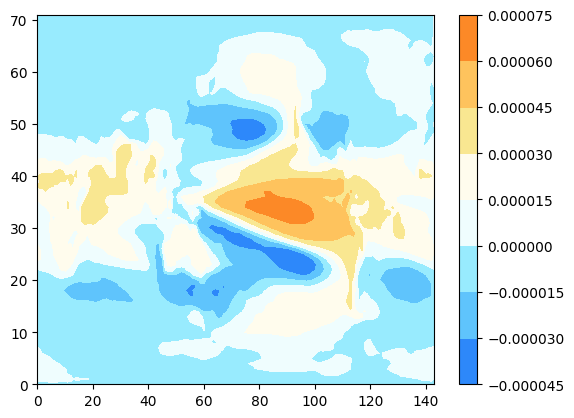

In [16]:
print(np.shape(linear_model.coef_))

map_item = np.reshape(linear_model.coef_, (72,144))
plt.contourf(map_item, cmap=custom_cmap)
plt.colorbar()

Text(0.5, 1.0, 'R^2 = 0.529')

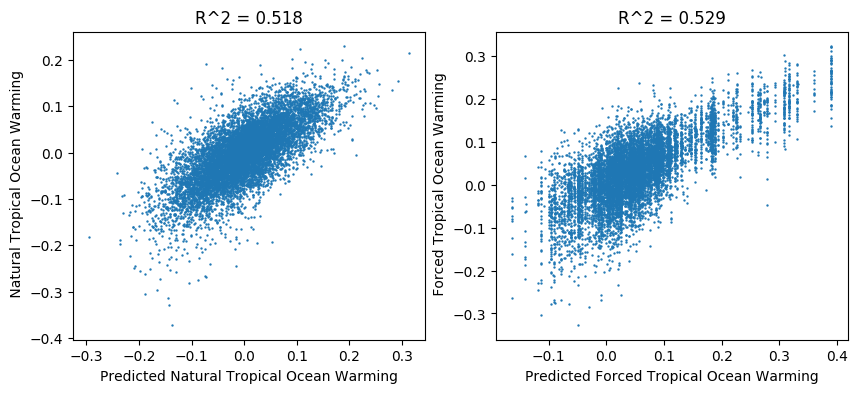

In [88]:
from scipy import stats
fig, axs = plt.subplots(1,2, figsize=(10,4))

################## Natural Predictions ####################
axs[0].scatter(TestingTargetData[:,1], Y_pred[:,1], s=0.5)
axs[0].set_xlabel('Predicted Natural Tropical Ocean Warming')
axs[0].set_ylabel(' Natural Tropical Ocean Warming')
R2 = stats.pearsonr(TestingTargetData[:,1], Y_pred[:,1])[0]**2
axs[0].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

################## Forced Predictions ####################
axs[1].scatter(TestingTargetData[:,4], Y_pred[:,4], s=0.5)
axs[1].set_xlabel('Predicted Forced Tropical Ocean Warming')
axs[1].set_ylabel(' Forced Tropical Ocean Warming')
R2 = stats.pearsonr(TestingTargetData[:,4], Y_pred[:,4])[0]**2
axs[1].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

Text(0.5, 1.0, 'R^2 = 0.535')

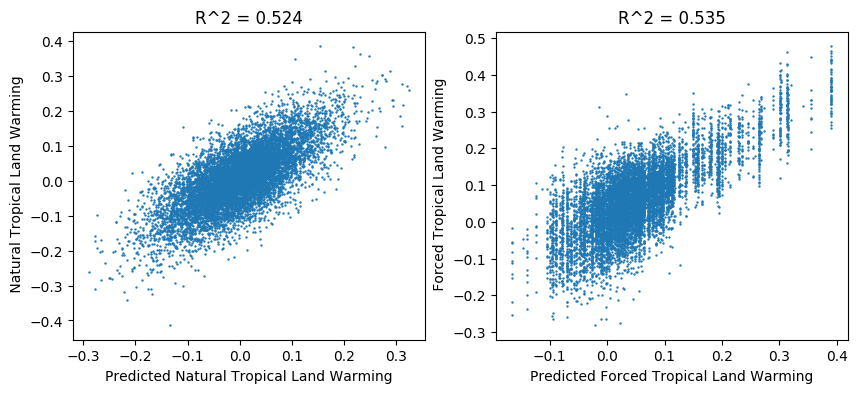

In [69]:
from scipy import stats
fig, axs = plt.subplots(1,2, figsize=(10,4))

################## Natural Predictions ####################
axs[0].scatter(TestingTargetData[:,2], Y_pred[:,2], s=0.5)
axs[0].set_xlabel('Predicted Natural Tropical Land Warming')
axs[0].set_ylabel(' Natural Tropical Land Warming')
R2 = stats.pearsonr(TestingTargetData[:,2], Y_pred[:,2])[0]**2
axs[0].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

################## Forced Predictions ####################
axs[1].scatter(TestingTargetData[:,5], Y_pred[:,5], s=0.5)
axs[1].set_xlabel('Predicted Forced Tropical Land Warming')
axs[1].set_ylabel(' Forced Tropical Land Warming')
R2 = stats.pearsonr(TestingTargetData[:,5], Y_pred[:,5])[0]**2
axs[1].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

Text(0.5, 1.0, 'R^2 = 0.621')

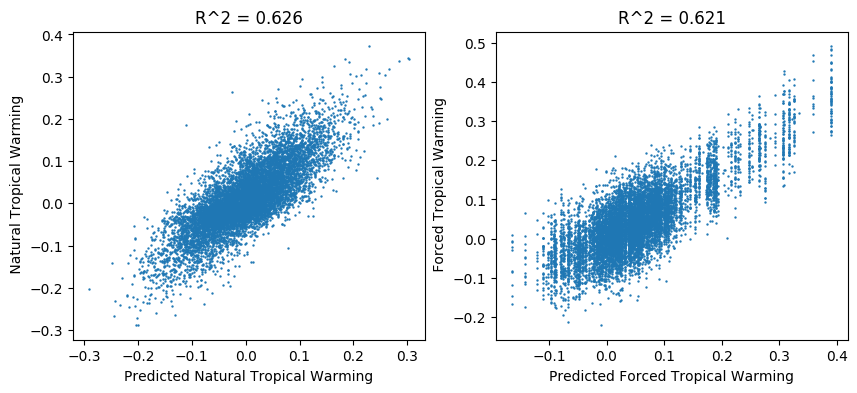

In [66]:
from scipy import stats
fig, axs = plt.subplots(1,2, figsize=(10,4))

################## Natural Predictions ####################
axs[0].scatter(TestingTargetData[:,0], Y_pred[:,0], s=0.5)
axs[0].set_xlabel('Predicted Natural Tropical Warming')
axs[0].set_ylabel(' Natural Tropical Warming')
R2 = stats.pearsonr(TestingTargetData[:,0], Y_pred[:,0])[0]**2
axs[0].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

################## Forced Predictions ####################
axs[1].scatter(TestingTargetData[:,3], Y_pred[:,3], s=0.5)
axs[1].set_xlabel('Predicted Forced Tropical Warming')
axs[1].set_ylabel(' Forced Tropical Warming')
R2 = stats.pearsonr(TestingTargetData[:,3], Y_pred[:,3])[0]**2
axs[1].set_title('R^2 = {accuracy}'.format(accuracy=str(R2)[:5]))

NameError: name 'pls_model' is not defined

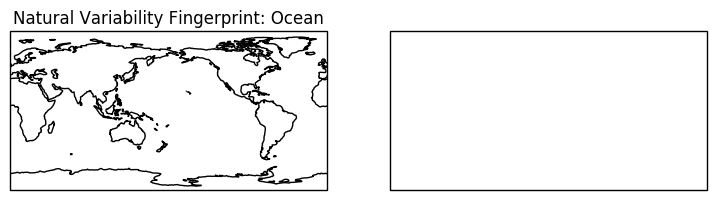

In [7]:
#Plotting is below
lat_bins = np.linspace(-90, 90., 72)
lon_bins = np.linspace(0, 357.5, 144)

lim = np.linspace(-.00009, .00009, 11)
subplot_kw = dict(projection=ccrs.PlateCarree(central_longitude=180))
fig, ax = plt.subplots(1, 2, figsize=(9, 4), subplot_kw=subplot_kw)
####################################################################################
ax[0].coastlines()
#ax[0].set_extent([0.0, -1, -90.0, 90.0])
ax[0].set_title('Natural Variability Fingerprint: Ocean')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,1], (72,144)), coord=lon_bins)
im = ax[0].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)
####################################################################################
ax[1].coastlines()
#ax[1].set_extent([0.0, -1, -90.0, 90.0])
ax[1].set_title('Forced Variability Fingerprint: Ocean')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,4], (72,144)), coord=lon_bins)

im = ax[1].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)




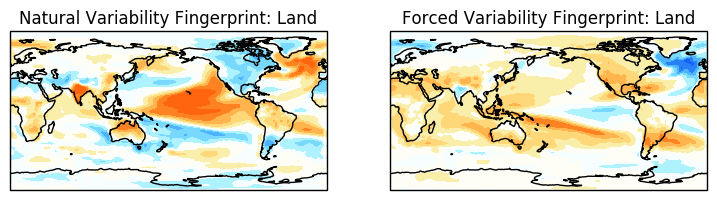

In [ ]:
#Plotting is below
lat_bins = np.linspace(-90, 90., 72)
lon_bins = np.linspace(0, 357.5, 144)

lim = np.linspace(-.00009, .00009, 11)
subplot_kw = dict(projection=ccrs.PlateCarree(central_longitude=180))
fig, ax = plt.subplots(1, 2, figsize=(9, 4), subplot_kw=subplot_kw)
####################################################################################
ax[0].coastlines()
#ax[0].set_extent([0.0, -1, -90.0, 90.0])
ax[0].set_title('Natural Variability Fingerprint: Land')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,2], (72,144)), coord=lon_bins)
im = ax[0].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)
####################################################################################
ax[1].coastlines()
#ax[1].set_extent([0.0, -1, -90.0, 90.0])
ax[1].set_title('Forced Variability Fingerprint: Land')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,5], (72,144)), coord=lon_bins)

im = ax[1].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)




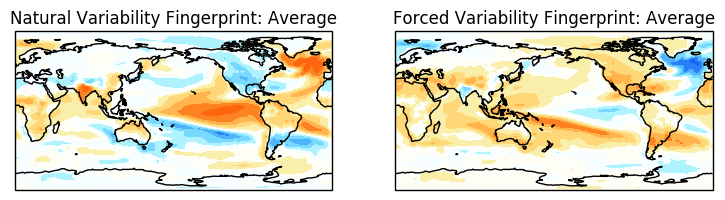

In [ ]:
#Plotting is below
lat_bins = np.linspace(-90, 90., 72)
lon_bins = np.linspace(0, 357.5, 144)

lim = np.linspace(-.00009, .00009, 11)
subplot_kw = dict(projection=ccrs.PlateCarree(central_longitude=180))
fig, ax = plt.subplots(1, 2, figsize=(9, 4), subplot_kw=subplot_kw)
####################################################################################
ax[0].coastlines()
#ax[0].set_extent([0.0, -1, -90.0, 90.0])
ax[0].set_title('Natural Variability Fingerprint: Average')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,0], (72,144)), coord=lon_bins)
im = ax[0].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)
####################################################################################
ax[1].coastlines()
#ax[1].set_extent([0.0, -1, -90.0, 90.0])
ax[1].set_title('Forced Variability Fingerprint: Average')
coef_map_cyclic, lon = add_cyclic_point(np.reshape(pls_model.coef_[:,3], (72,144)), coord=lon_bins)

im = ax[1].contourf(lon, lat_bins, coef_map_cyclic, 20, levels=lim,
                    transform=ccrs.PlateCarree(), extend='both', cmap=custom_cmap)


